### CMB Assigment 2 Program ###

In [1]:
# Program, run imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
import requests
sns.set(style="darkgrid")

Create Pandas Dataframe

In [2]:
#df = pd.read_csv("data/21-12-23_complete.csv")
data_folder = "/Users/Fabian/Desktop/"
df = pd.read_csv(data_folder + "1dayAll.csv", encoding = "latin")
#df = pd.read_csv("data/2022-01-04_complete.csv")
print(df)
# ['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info', 'dst port']


             No.                        Time           Source  \
0              1  2022-01-16 22:04:03.993585     192.168.0.88   
1              2  2022-01-16 22:04:03.997303      192.168.0.5   
2              3  2022-01-16 22:04:04.055476  199.232.138.248   
3              4  2022-01-16 22:04:04.057104      192.168.0.9   
4              5  2022-01-16 22:04:04.070783  199.232.138.248   
...          ...                         ...              ...   
1117455  1117456  2022-01-17 17:05:50.550259   188.164.238.26   
1117456  1117457  2022-01-17 17:05:50.550547   188.164.238.26   
1117457  1117458  2022-01-17 17:05:50.595386     192.168.0.22   
1117458  1117459  2022-01-17 17:05:50.605007     192.168.0.22   
1117459  1117460  2022-01-17 17:05:50.607387   188.164.238.26   

             Destination Protocol  Length  \
0            192.168.0.5      SSH     190   
1           192.168.0.88      TCP      66   
2            192.168.0.9      TCP     730   
3        199.232.138.248      TCP      

Filter local traffic

In [3]:
# source and destination should not start with 192.168 to filter local network
filtered = df.loc[~df['Source'].str.startswith("192.168") & df['Destination'].str.startswith("192.168") |
                 df['Source'].str.startswith("192.168") & ~df['Destination'].str.startswith("192.168")]
df = filtered.copy()
print(df)

             No.                        Time           Source  \
2              3  2022-01-16 22:04:04.055476  199.232.138.248   
3              4  2022-01-16 22:04:04.057104      192.168.0.9   
4              5  2022-01-16 22:04:04.070783  199.232.138.248   
5              6  2022-01-16 22:04:04.109911      192.168.0.9   
6              7  2022-01-16 22:04:04.363595  199.232.138.248   
...          ...                         ...              ...   
1117455  1117456  2022-01-17 17:05:50.550259   188.164.238.26   
1117456  1117457  2022-01-17 17:05:50.550547   188.164.238.26   
1117457  1117458  2022-01-17 17:05:50.595386     192.168.0.22   
1117458  1117459  2022-01-17 17:05:50.605007     192.168.0.22   
1117459  1117460  2022-01-17 17:05:50.607387   188.164.238.26   

             Destination Protocol  Length  \
2            192.168.0.9      TCP     730   
3        199.232.138.248      TCP      66   
4            192.168.0.9      TCP    1842   
5        199.232.138.248      TCP      

In [4]:
# helper functions
def utcEntryToTimestamp(entry):
    row_entry = entry.split(".")[0]
    TIME_FORMAT='%Y-%m-%d %H:%M:%S'
    ts = int(datetime.strptime(row_entry, TIME_FORMAT).timestamp())
    return ts

def utcRowToTimestamp(row):
    return utcEntryToTimestamp(row.at['Time'])
utcRowToTimestamp(df.iloc[0])
# print(df.loc[0].at['Time'])

1642367044

### Protocol packet distribution ###

Protocol
DHCP             59
DNS             698
H1                1
HTTP            554
HTTP/JSON       457
HTTP/XML          2
ICMP             41
IGMPv2         6638
IGMPv3         5697
MDNS          73901
NTP             556
QUIC           1827
SSDP          62486
SSLv2          7018
TCP          548631
TLSv1           200
TLSv1.2      112483
TLSv1.3         851
UDP             288
Name: Source, dtype: int64


/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_11909/1857181538.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


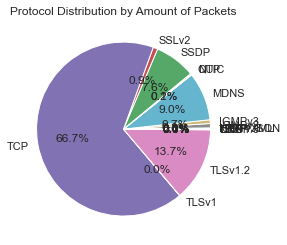

In [5]:
print(df.groupby('Protocol').Source.count())

count_protocol_packets = df.groupby('Protocol').Source.count()

fig, ax = plt.subplots()
plt.title('Protocol Distribution by Amount of Packets')
ax.pie(count_protocol_packets, labels=count_protocol_packets.keys(), autopct='%1.1f%%',)
fig.show()

### Amount of data traffic per protocol ###

/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_11909/3895533642.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Protocol
DHCP             21259
DNS              96797
H1                  77
HTTP            125474
HTTP/JSON       220673
HTTP/XML          2538
ICMP              5121
IGMPv2          390986
IGMPv3          349786
MDNS          20974278
NTP              50040
QUIC            967873
SSDP          22418224
SSLv2         12790803
TCP          410369042
TLSv1           148764
TLSv1.2       79278291
TLSv1.3         588664
UDP              30561
Name: Length, dtype: int64


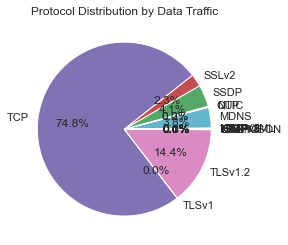

In [6]:
count_protocol_traffic = df.groupby('Protocol').Length.sum()
print(count_protocol_traffic)
fig, ax = plt.subplots()
plt.title('Protocol Distribution by Data Traffic')
ax.pie(count_protocol_traffic, labels=count_protocol_traffic.keys(), autopct='%1.1f%%',)
fig.show()

### Average Data length per Protocol Type ###

Protocol
DHCP          360.322034
DNS           138.677650
H1             77.000000
HTTP          226.487365
HTTP/JSON     482.873085
HTTP/XML     1269.000000
ICMP          124.902439
IGMPv2         58.901175
IGMPv3         61.398280
MDNS          283.815889
NTP            90.000000
QUIC          529.760810
SSDP          358.771949
SSLv2        1822.570960
TCP           747.987339
TLSv1         743.820000
TLSv1.2       704.802423
TLSv1.3       691.732080
UDP           106.114583
Name: Length, dtype: float64


/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_11909/212732153.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


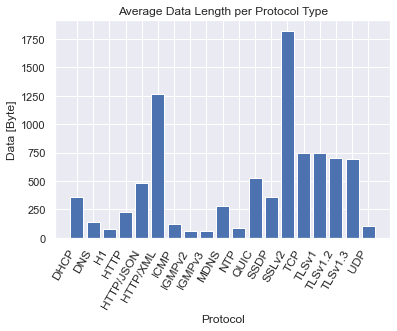

In [7]:
average_protocol_packet_length = df.groupby('Protocol').Length.sum() / df.groupby('Protocol').Length.count()
print(average_protocol_packet_length)
fig, ax = plt.subplots()
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='x', which='minor', labelsize=12)
plt.xlabel('Protocol')
plt.ylabel('Data [Byte]')
plt.title('Average Data Length per Protocol Type')
ax.bar(average_protocol_packet_length.keys(), average_protocol_packet_length, align='center',)
plt.xticks(rotation=60, ha="right")
fig.show()

### Source addresses ###

In [8]:
print(df.groupby('Source').Time.count())
print(df.groupby('Destination').Time.count().sort_values())

Source
104.121.176.87      25
104.122.85.142      18
104.18.30.112        8
104.18.30.82       101
104.199.65.124    3814
                  ... 
92.123.229.80        7
94.130.184.193       1
94.16.116.137        1
99.84.82.10         15
99.84.82.74         31
Name: Time, Length: 311, dtype: int64
Destination
5.9.7.51                1
193.2.78.228            1
216.239.35.8            1
78.31.67.99             1
35.153.21.233           1
                    ...  
224.0.0.251         77693
199.232.138.248     88263
192.168.0.22       149684
188.164.238.26     154839
192.168.0.9        205301
Name: Time, Length: 308, dtype: int64


### DNS requests ###

In [9]:
df_dns = df[df['Protocol'].isin(['DNS'])]
df_dns.head()
df_dns_requests_1 = df_dns[df_dns['Info'].str.contains('Standard query')]
# does not contain response
df_dns_requests_2 = df_dns_requests_1[~df_dns_requests_1['Info'].str.contains('response')]
df_dns_resources = df_dns_requests_2['Info'].apply(lambda x: x.split(' ')[-1]).value_counts()
print(df_dns_resources)
# print(df_dns_requests)
# print(df_dns['Info'])


firetvcaptiveportal.com         79
device-metrics-us.amazon.com    16
msh.amazon.co.uk                16
arcus-uswest.amazon.com         14
api.amazon.com                  14
                                ..
2.android.pool.ntp.org           2
238.36.251.142.in-addr.arpa      1
174.36.251.142.in-addr.arpa      1
19.30.232.85.in-addr.arpa        1
8.0.168.192.in-addr.arpa         1
Name: Info, Length: 63, dtype: int64


### IP Wordlwide location

In [10]:
df_destinations =  df['Destination'].unique()

for dest in df_destinations[:10]: # 10 entries limit for now
    if dest.startswith("192.168"):
            continue
    headers = { 'User-Agent': "keycdn-tools:https://www.example.com" }
    url = "https://tools.keycdn.com/geo.json?host={}".format(dest)
    r = requests.get(url, headers=headers)
    print(r.json() )  


{'status': 'success', 'description': 'Data successfully received.', 'data': {'geo': {'host': '199.232.138.248', 'ip': '199.232.138.248', 'rdns': '199.232.138.248', 'asn': 54113, 'isp': 'FASTLY', 'country_name': 'Germany', 'country_code': 'DE', 'region_name': 'Hesse', 'region_code': 'HE', 'city': 'Frankfurt am Main', 'postal_code': '60313', 'continent_name': 'Europe', 'continent_code': 'EU', 'latitude': 50.1188, 'longitude': 8.6843, 'metro_code': None, 'timezone': 'Europe/Berlin', 'datetime': '2022-01-17 18:16:22'}}}
{'status': 'success', 'description': 'Data successfully received.', 'data': {'geo': {'host': '188.164.238.26', 'ip': '188.164.238.26', 'rdns': '188.164.238.26', 'asn': 198145, 'isp': 'SWM Services GmbH', 'country_name': 'Germany', 'country_code': 'DE', 'region_name': 'Bavaria', 'region_code': 'BY', 'city': 'Munich', 'postal_code': '80331', 'continent_name': 'Europe', 'continent_code': 'EU', 'latitude': 48.1336, 'longitude': 11.5658, 'metro_code': None, 'timezone': 'Europe/B

### Data traffic over time ###

from  1642367044  to  1642435550
77
[28881. 38073. 39399.  6930.  6941.  6882.  6868.  6850.  6790.  6842.
  6241.  6014.  6073.  6132.  6109.  6111.  6210.  9004.  6117.  5869.
  6033.  6118.  6063.  6019.  6074.  6118.  6125.  6155.  5888.  5983.
  6054.  6076.  6086.  5951.  5764.  5781.  5794.  5772.  6062.  5951.
  6048.  9030.  7450.  7688.  7353.  7617.  7735.  6754.  7944.  6840.
  7360.  7431.  6918.  7296.  7245.  7038.  6930.  6669.  7014.  7228.
  7482.  7512.  7447.  7738. 41900. 44228. 43634. 43520. 44662. 43060.
  8930.  7696.  7575.  6864.  6941.  6590.  2818.]
[28345. 36984. 39467.  2759.  2784.  2754.  2756.  2730.  2706.  2761.
  2574.  2516.  2518.  2541.  2536.  2528.  2564.  5172.  2546.  2475.
  2527.  2558.  2537.  2541.  2557.  2569.  2577.  2589.  2515.  2536.
  2564.  2581.  2588.  2529.  2461.  2479.  2474.  2466.  2549.  2513.
  2542.  4063.  2904.  2993.  2886.  3027.  2972.  2776.  3309.  2745.
  2885.  2942.  2803.  2925.  2862.  2789.  2791.  3016.  281

/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_11909/2888101978.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/px/zjht8g6j4bvglsnf70rp41d80000gn/T/ipykernel_11909/2888101978.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


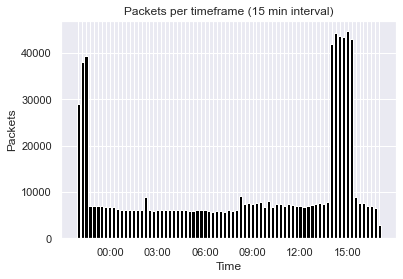

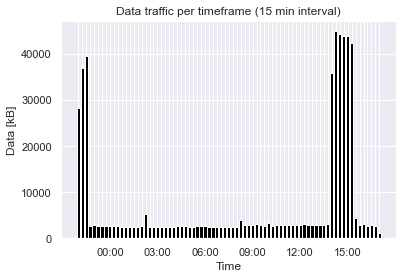

In [12]:
def timeMapping(x):
    # include time difference UTC+1
    time = datetime.utcfromtimestamp(x*min_15_duration + 3600)
    if time.minute == 0 and time.hour % 3 == 0:
        return time.strftime("%H:%M")
    else:
        return ""

# find first and last timestamp, then create data structure
min_15_duration = 60 * 15
df_time_mod = df.copy()
df_time_mod['Time'] = df_time_mod['Time'].apply(lambda x: utcEntryToTimestamp(x)) # map to 15 min window
df_time_mod.head()
first_entry = df_time_mod.iloc[0].at['Time'] // min_15_duration
last_entry = df_time_mod.iloc[-1].at['Time'] // min_15_duration

print('from ', df_time_mod.iloc[0].at['Time'], " to ", df_time_mod.iloc[-1].at['Time'])

count_packets = np.zeros(last_entry - first_entry + 1)
length_packets = np.zeros(last_entry - first_entry + 1)

x_values_packets = list(range(first_entry, last_entry + 1))
print(len(x_values_packets))

mapping_res = list(map(timeMapping, x_values_packets))

# print(mapping_res)

for index, row in df_time_mod.iterrows():
    ts = row.at['Time'] // min_15_duration
    count_packets[ts - first_entry] += 1
    length_packets[ts - first_entry] += row.at['Length']

length_packets = length_packets // 1000
print(count_packets)
print(length_packets)

fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Packets')
plt.title('Packets per timeframe (15 min interval)')
plt.xticks(x_values_packets, mapping_res)
ax.bar(x_values_packets, count_packets, color='black')
fig.show()

fig, ax = plt.subplots()
plt.xlabel('Time')
plt.ylabel('Data [kB]')
plt.title('Data traffic per timeframe (15 min interval)')
plt.xticks(x_values_packets, mapping_res)
ax.bar(x_values_packets, length_packets, color='black')
fig.show()